# 2.2.

In [1]:
import pandas as pd

# Set the file path
file_path = r"C:\Users\PMLS\Desktop\Projects\Python Projects\ا\data-set-assignment.xlsx"

# Load the dataset into a pandas DataFrame
data = pd.read_excel(file_path)

# Display summary of the dataset
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1001 non-null   datetime64[ns]
 1   Country(UK)    1001 non-null   object        
 2   Confectionary  1001 non-null   object        
 3   Units Sold     996 non-null    float64       
 4   Revenue(£)     992 non-null    float64       
 5   Cost(£)        992 non-null    float64       
 6   Profit(£)      998 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 54.9+ KB
None
                                Date   Units Sold    Revenue(£)       Cost(£)  \
count                           1001   996.000000    992.000000    992.000000   
mean   2002-11-19 10:54:32.727272832  1633.360442   6847.601815   2820.190877   
min              2000-01-02 00:00:00   200.000000    200.000000     40.000000   
25%              2001-05-12 00:00:

# 2.3 & 2.4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1001 non-null   datetime64[ns]
 1   Country(UK)    1001 non-null   object        
 2   Confectionary  1001 non-null   object        
 3   Units Sold     996 non-null    float64       
 4   Revenue(£)     992 non-null    float64       
 5   Cost(£)        992 non-null    float64       
 6   Profit(£)      998 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 54.9+ KB
None
                                Date   Units Sold    Revenue(£)       Cost(£)  \
count                           1001   996.000000    992.000000    992.000000   
mean   2002-11-19 10:54:32.727272832  1633.360442   6847.601815   2820.190877   
min              2000-01-02 00:00:00   200.000000    200.000000     40.000000   
25%              2001-05-12 00:00:

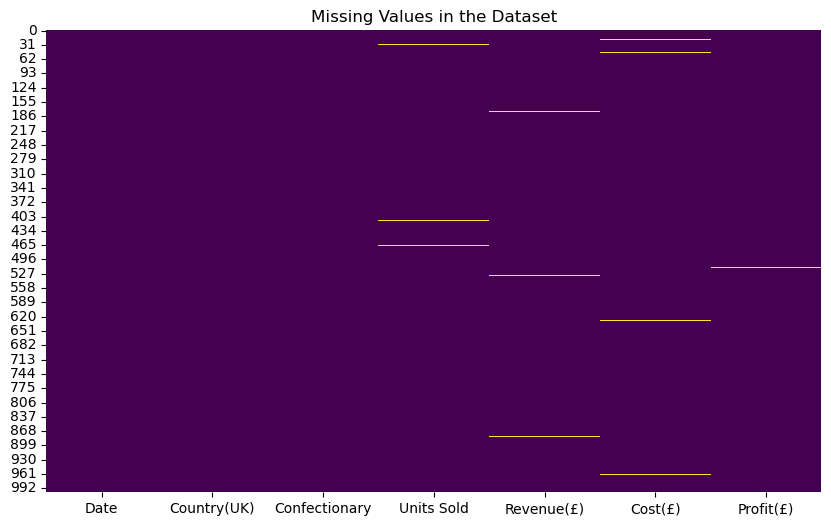

C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

<Figure size 1200x800 with 0 Axes>

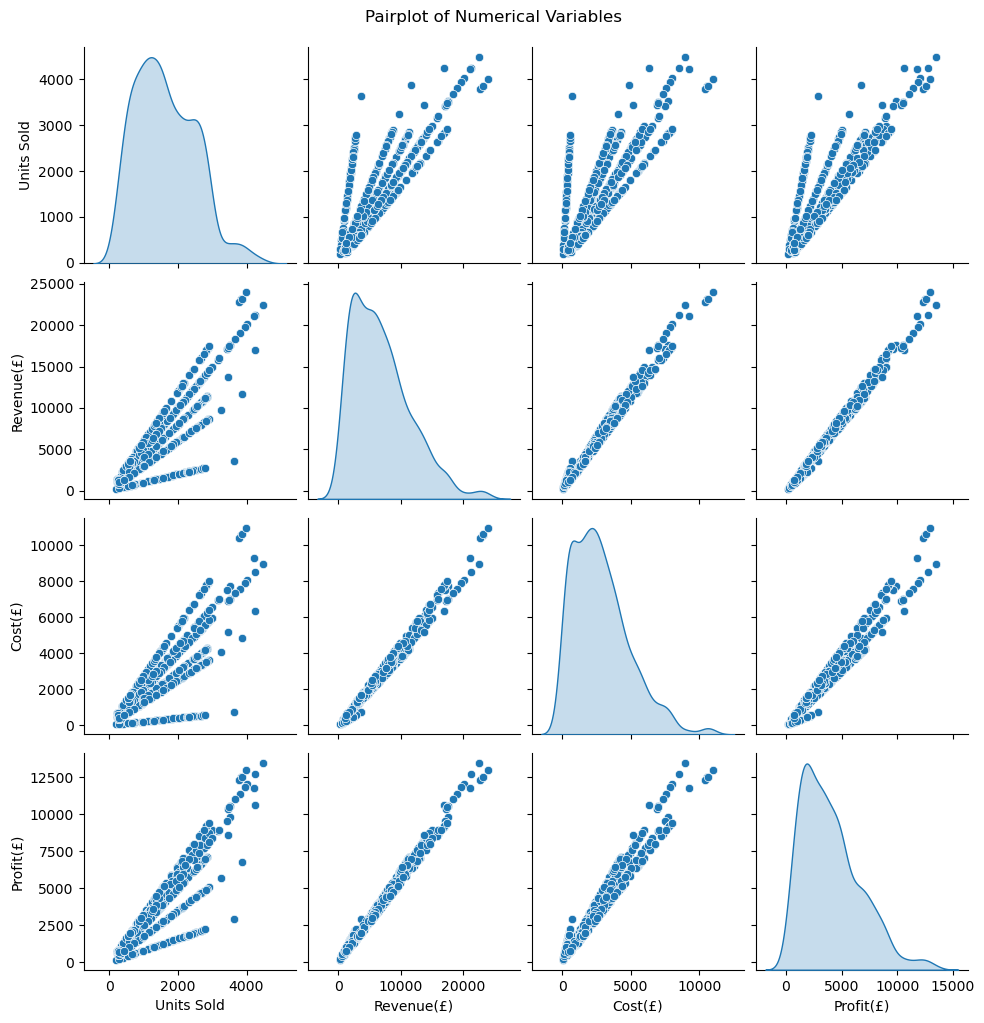

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the file path
file_path = r"C:\Users\PMLS\Desktop\Projects\Python Projects\ا\data-set-assignment.xlsx"

# Load the dataset into a pandas DataFrame
data = pd.read_excel(file_path)

# Display summary of the dataset
print(data.info())
print(data.describe())

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values in the Dataset')
plt.show()

# Visualize distribution of numerical variables
plt.figure(figsize=(12, 8))
sns.pairplot(data.dropna(), diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


In [4]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Print the result
print("Missing values in the dataset:")
print(missing_values)


Missing values in the dataset:
Date             0
Country(UK)      0
Confectionary    0
Units Sold       5
Revenue(£)       9
Cost(£)          9
Profit(£)        3
dtype: int64


In [5]:
# Imputation: Fill missing values with mean
data['Units Sold'].fillna(data['Units Sold'].mean(), inplace=True)
data['Revenue(£)'].fillna(data['Revenue(£)'].mean(), inplace=True)
data['Cost(£)'].fillna(data['Cost(£)'].mean(), inplace=True)
data['Profit(£)'].fillna(data['Profit(£)'].mean(), inplace=True)


# Exclusion: Drop rows with missing values
data.dropna(inplace=True)


In [6]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Print the result
print("Missing values in the dataset:")
print(missing_values)


Missing values in the dataset:
Date             0
Country(UK)      0
Confectionary    0
Units Sold       0
Revenue(£)       0
Cost(£)          0
Profit(£)        0
dtype: int64


# 2.5

No duplicate rows found.


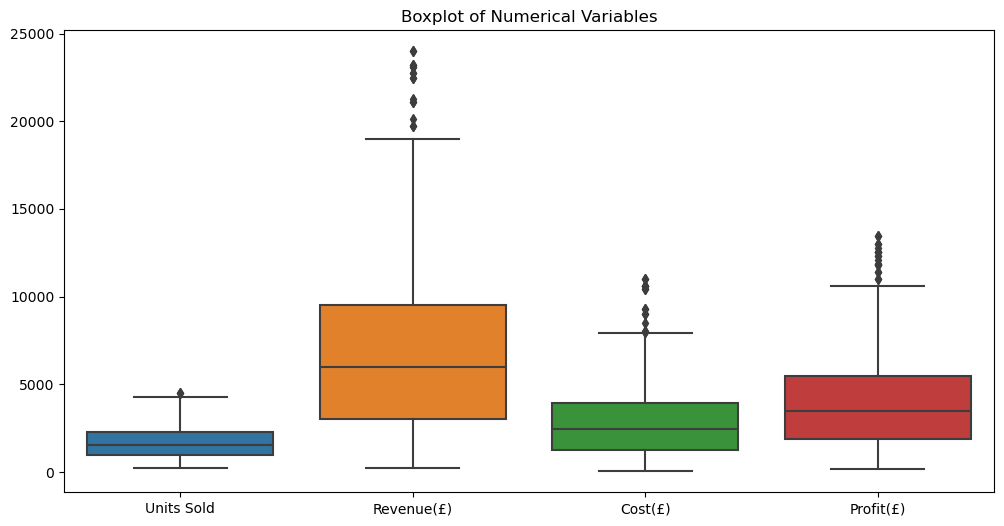

In [7]:
# Handle missing values
data.dropna(inplace=True)

# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found. Removing duplicates...")
    data.drop_duplicates(inplace=True)
else:
    print("No duplicate rows found.")

# Check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Units Sold', 'Revenue(£)', 'Cost(£)', 'Profit(£)']])
plt.title('Boxplot of Numerical Variables')
plt.show()


In [8]:
from scipy.stats import zscore

# Calculate z-scores for numerical variables
z_scores = zscore(data[['Units Sold', 'Revenue(£)', 'Cost(£)', 'Profit(£)']])

# Define threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Identify outliers
outliers = data[(z_scores > threshold).any(axis=1)]

# Print the outliers
print("Outliers identified using z-score method:")
print(outliers)


Outliers identified using z-score method:
          Date Country(UK) Confectionary  Units Sold  Revenue(£)   Cost(£)  \
43  2002-10-25     England   Caramel nut      3851.0     23106.0  10590.25   
50  2005-05-28     England   Caramel nut      3794.0     22764.0  10433.50   
147 2003-09-17    Scotland   Caramel nut      3864.0     23184.0  10626.00   
157 2005-09-19    Scotland   Caramel nut      3998.0     23988.0  10994.50   
204 2000-12-12       Wales       Biscuit      4220.0     21100.0   9284.00   
373 2001-03-06      Jersey       Caramel      4493.0     22465.0   8986.00   
486 2005-09-07     England       Caramel      4251.0     21255.0   8502.00   
495 2001-03-05     England       Caramel      4026.0     20130.0   8052.00   
568 2002-05-16     England       Caramel      3851.0     23106.0  10590.25   
575 2004-07-21     England       Caramel      3794.0     22764.0  10433.50   
672 2005-07-05    Scotland   Caramel Nut      3864.0     23184.0  10626.00   
682 2002-03-17    Scot

In [9]:
# Print outliers as a formatted table using Pandas
print("Outliers identified using z-score method:")
print(outliers.to_string(index=False))


Outliers identified using z-score method:
      Date Country(UK) Confectionary  Units Sold  Revenue(£)  Cost(£)  Profit(£)
2002-10-25     England   Caramel nut      3851.0     23106.0 10590.25   12515.75
2005-05-28     England   Caramel nut      3794.0     22764.0 10433.50   12330.50
2003-09-17    Scotland   Caramel nut      3864.0     23184.0 10626.00   12558.00
2005-09-19    Scotland   Caramel nut      3998.0     23988.0 10994.50   12993.50
2000-12-12       Wales       Biscuit      4220.0     21100.0  9284.00   11816.00
2001-03-06      Jersey       Caramel      4493.0     22465.0  8986.00   13479.00
2005-09-07     England       Caramel      4251.0     21255.0  8502.00   12753.00
2001-03-05     England       Caramel      4026.0     20130.0  8052.00   12078.00
2002-05-16     England       Caramel      3851.0     23106.0 10590.25   12515.75
2004-07-21     England       Caramel      3794.0     22764.0 10433.50   12330.50
2005-07-05    Scotland   Caramel Nut      3864.0     23184.0 10626.

# 2.6

In [10]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and testing sets
X = data[['Units Sold']]
y = data['Profit(£)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the results rounded to 2 decimal places
print("Simple Linear Regression Results:")
print("Mean Squared Error:", round(mse, 2))
print("R-squared:", round(r2, 2))
print("Intercept:", round(model.intercept_, 2))
print("Coefficient:", round(model.coef_[0], 2))




Simple Linear Regression Results:
Mean Squared Error: 1805658.86
R-squared: 0.72
Intercept: -102.46
Coefficient: 2.5


In [11]:
import statsmodels.api as sm

X = sm.add_constant(data[['Units Sold']])
y = data['Profit(£)']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Get the p-values
p_values = model.pvalues

# Print the p-values
print("P-values for Multiple Linear Regression:")
print(p_values)

P-values for Multiple Linear Regression:
const          2.551799e-01
Units Sold    6.654236e-261
dtype: float64


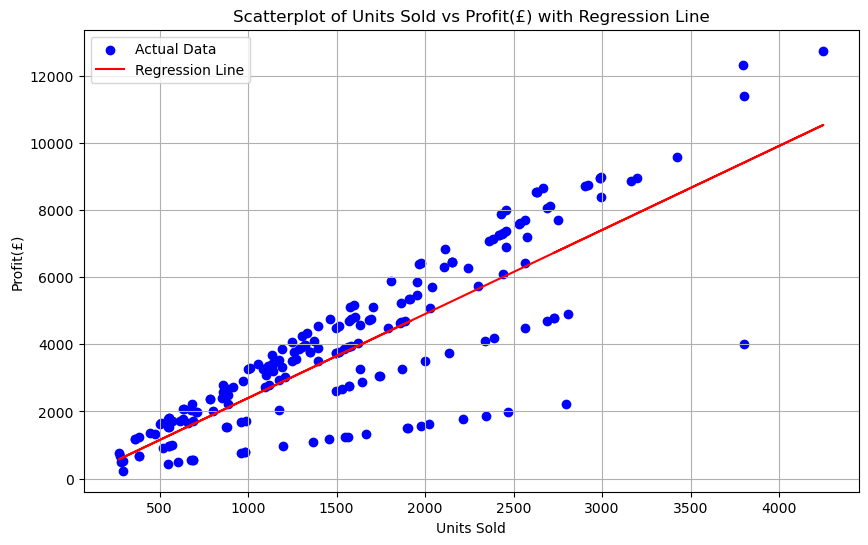

In [17]:
# Plotting the scatterplot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, model.predict(X_test), color='red', label='Regression Line')
plt.xlabel('Units Sold')
plt.ylabel('Profit(£)')
plt.title('Scatterplot of Units Sold vs Profit(£) with Regression Line')
plt.legend()
plt.grid(True)
plt.show()


# 2.7

In [12]:
# Splitting the data into training and testing sets
X = data[['Units Sold', 'Revenue(£)', 'Cost(£)']]
y = data['Profit(£)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the multiple regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the results
print("Multiple Regression Results:")
print("R-squared:", round(r2, 2))
print("Intercept:", round(model.intercept_, 2))
print("Coefficients:", [round(coef, 2) for coef in model.coef_])



Multiple Regression Results:
R-squared: 0.98
Intercept: -21.01
Coefficients: [0.26, 0.66, -0.32]


In [13]:
import statsmodels.api as sm

X = sm.add_constant(data[['Units Sold', 'Revenue(£)', 'Cost(£)']])
y = data['Profit(£)']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Get the p-values
p_values = model.pvalues

# Print the p-values
print("P-values for Multiple Linear Regression:")
print(p_values)


P-values for Multiple Linear Regression:
const          7.723490e-02
Units Sold     1.116949e-41
Revenue(£)    4.714826e-184
Cost(£)        2.542875e-09
dtype: float64


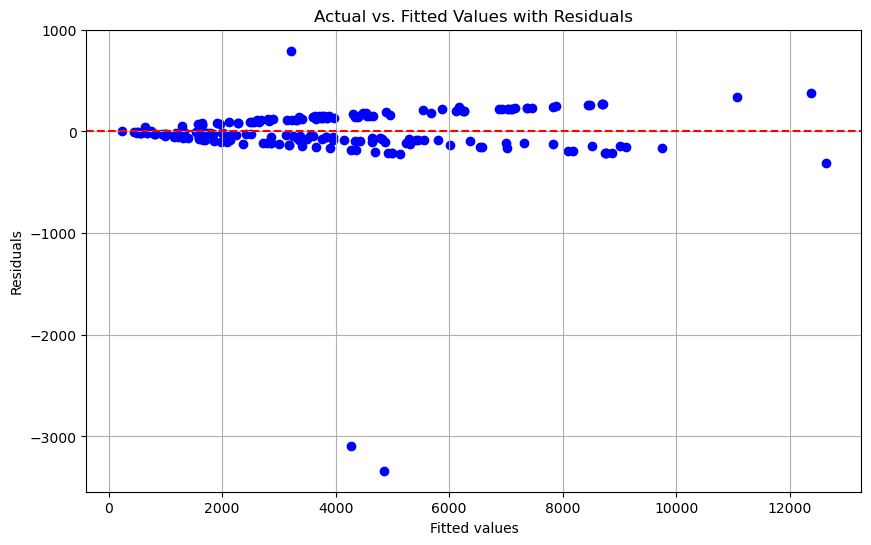

In [14]:
# Calculating residuals
residuals = y_test - y_pred

# Plotting actual vs. fitted values with residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Actual vs. Fitted Values with Residuals')
plt.grid(True)
plt.show()


# 2.8

In [15]:
# Calculating correlation matrix
correlation_matrix = data[['Units Sold', 'Revenue(£)', 'Cost(£)', 'Profit(£)']].corr()

# Displaying correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
            Units Sold  Revenue(£)   Cost(£)  Profit(£)
Units Sold    1.000000    0.799822  0.747128   0.834562
Revenue(£)    0.799822    1.000000  0.987456   0.990139
Cost(£)       0.747128    0.987456  1.000000   0.969486
Profit(£)     0.834562    0.990139  0.969486   1.000000


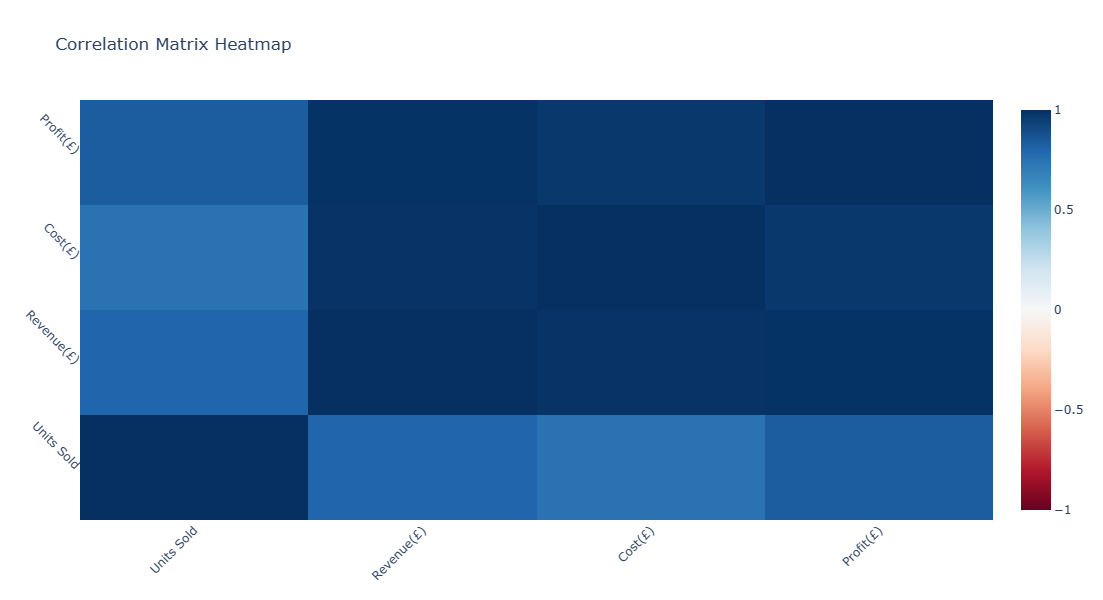

In [16]:
import plotly.graph_objects as go

# Create heatmap figure
fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.index,
                   colorscale='RdBu',
                   zmin=-1, zmax=1,
                   hoverongaps = False))

# Customize layout
fig.update_layout(
    title='Correlation Matrix Heatmap',
    xaxis=dict(tickangle=-45),
    yaxis=dict(tickangle=45),
    width=800,
    height=600
)

# Show plot
fig.show()


# 2.9

In [17]:
# Group the data by Country(UK) and Confectionary, and calculate total units sold
sales_by_country_confectionary = data.groupby(['Country(UK)', 'Confectionary'])['Units Sold'].sum().reset_index()

# Find the confectionary with the highest sales in each region
highest_sales_by_country = sales_by_country_confectionary.loc[sales_by_country_confectionary.groupby('Country(UK)')['Units Sold'].idxmax()]

# Print the results
print("Confectionary with the highest sales in each region:")
print(highest_sales_by_country)


Confectionary with the highest sales in each region:
   Country(UK) Confectionary     Units Sold
2      England       Caramel  185144.000000
7       Jersey       Caramel  114498.000000
14  N. Ireland       Caramel   96101.360442
21    Scotland       Caramel  112194.000000
29       Wales       Caramel   74976.000000


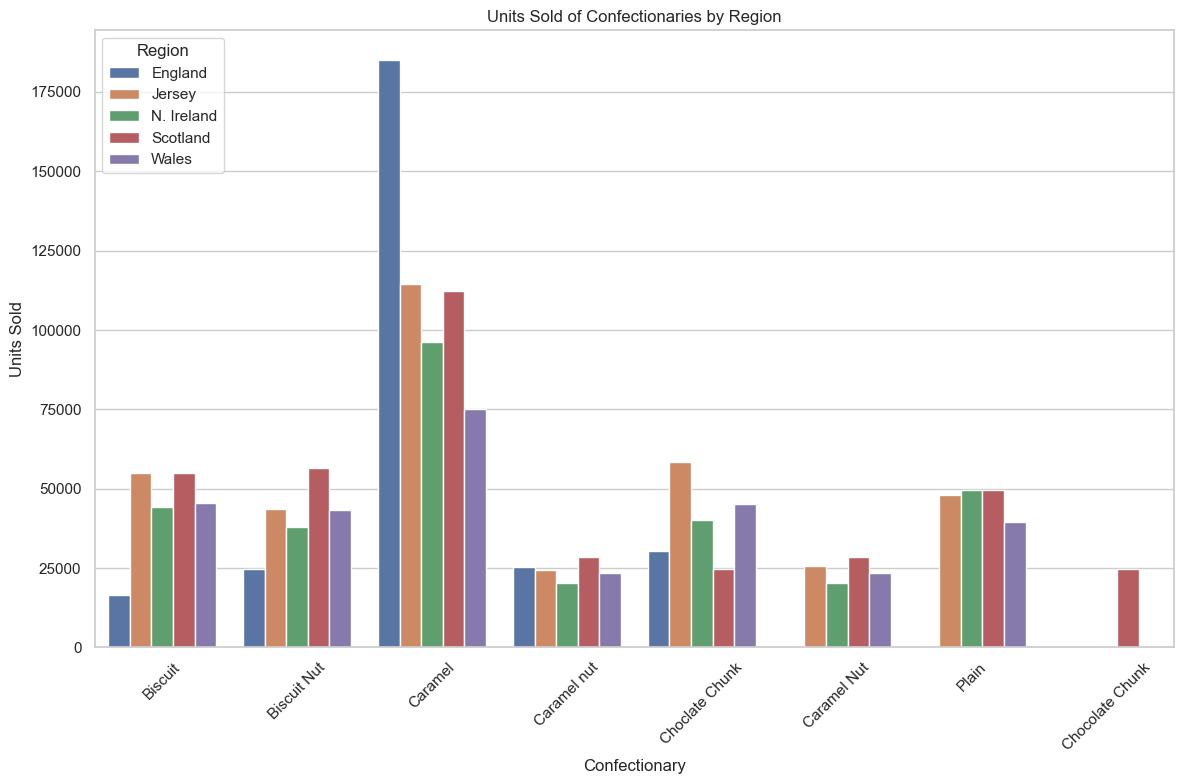

In [18]:
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot clustered bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_by_country_confectionary, x='Confectionary', y='Units Sold', hue='Country(UK)')
plt.title('Units Sold of Confectionaries by Region')
plt.xlabel('Confectionary')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()


# 2.10

In [24]:
# Import necessary libraries
from sklearn.cluster import KMeans

# Prepare data for KNN clustering
X = data[['Units Sold', 'Revenue(£)', 'Cost(£)', 'Profit(£)']]

# Perform KNN clustering
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(X)

# Print the clustering results
print(data[['Units Sold', 'Revenue(£)', 'Cost(£)', 'Profit(£)', 'Cluster']].head())


C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



   Units Sold  Revenue(£)  Cost(£)  Profit(£)  Cluster
0      1118.0      5590.0   2459.6     3130.4        0
1       708.0      3540.0   1557.6     1982.4        1
2      1269.0      6345.0   2791.8     3553.2        0
3      1631.0      8155.0   3588.2     4566.8        0
4      2240.0     11200.0   4928.0     6272.0        0


In [25]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Prepare data for decision tree analysis
X = data[['Units Sold', 'Revenue(£)', 'Cost(£)', 'Profit(£)']]
y = data['Cluster']  # Assuming 'Cluster' column represents the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the trained model
accuracy = clf.score(X_test, y_test)
print("Accuracy of Decision Tree Classifier: {:.2f}".format(accuracy))


Accuracy of Decision Tree Classifier: 1.00


# 2.11

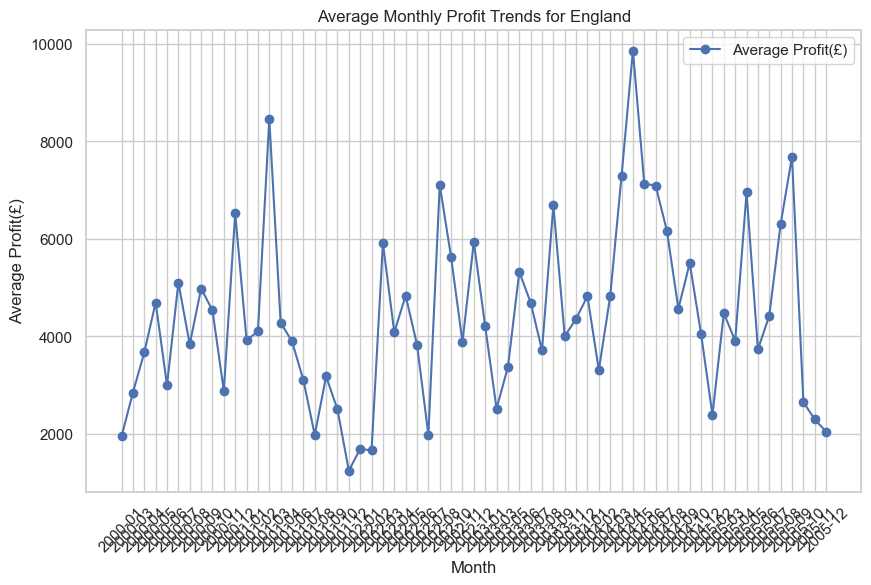

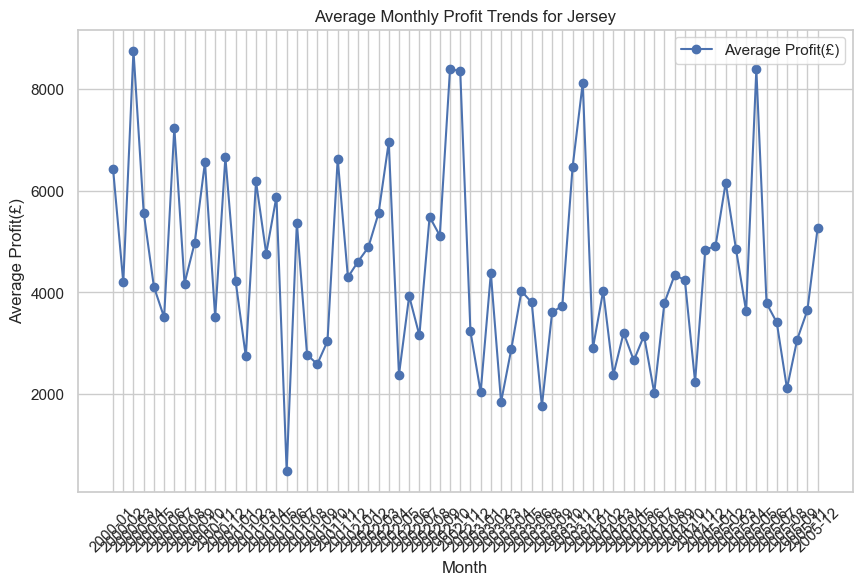

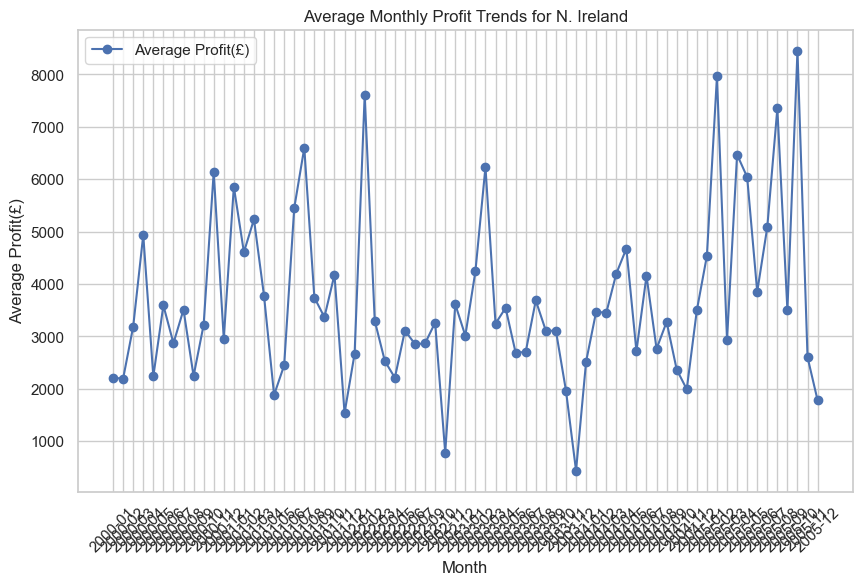

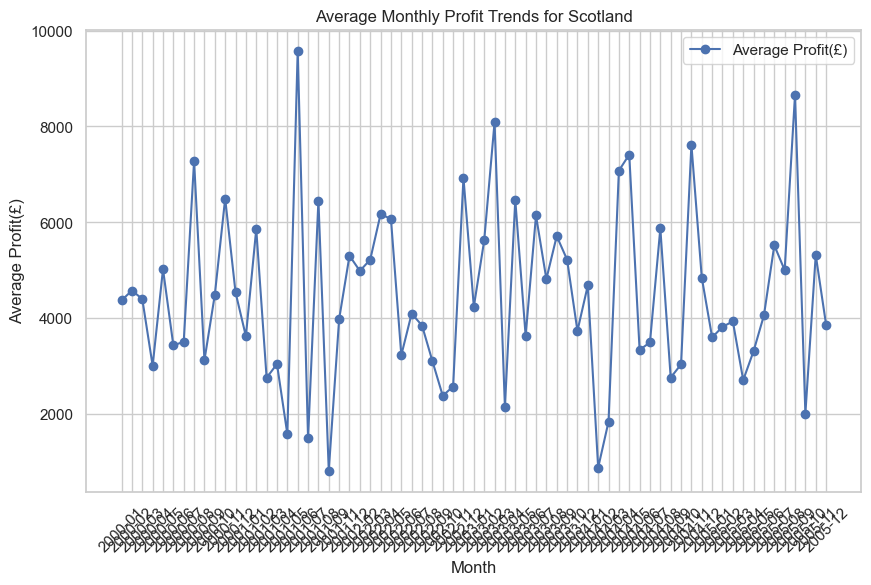

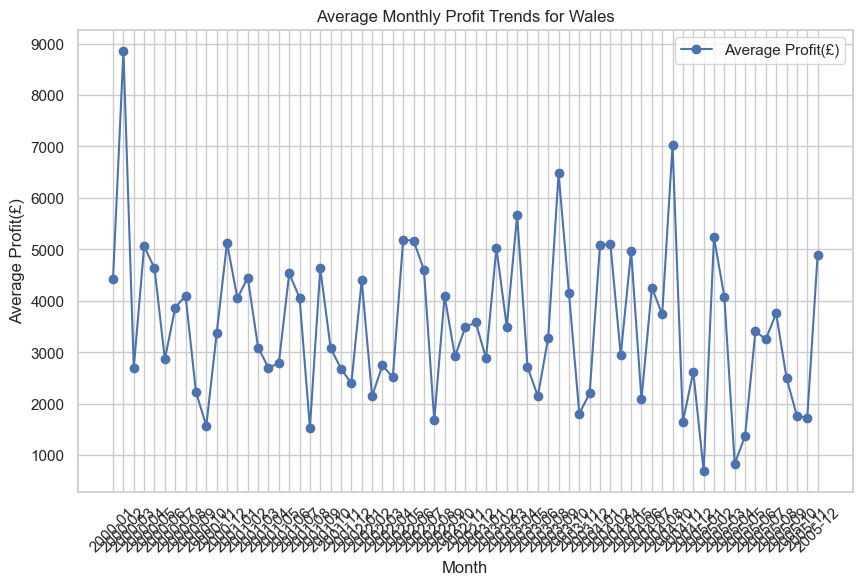

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group data by country and month, and calculate average profit
monthly_profit = data.groupby([data['Country(UK)'], data['Date'].dt.to_period('M')])['Profit(£)'].mean().reset_index()

# Separate data for each country
countries = monthly_profit['Country(UK)'].unique()
country_data = {country: monthly_profit[monthly_profit['Country(UK)'] == country] for country in countries}

# Visualize average profit trends for each country over monthly intervals
for country, country_df in country_data.items():
    plt.figure(figsize=(10, 6))
    plt.plot(country_df['Date'].astype(str), country_df['Profit(£)'], marker='o', label='Average Profit(£)')
    plt.title(f'Average Monthly Profit Trends for {country}')
    plt.xlabel('Month')
    plt.ylabel('Average Profit(£)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()


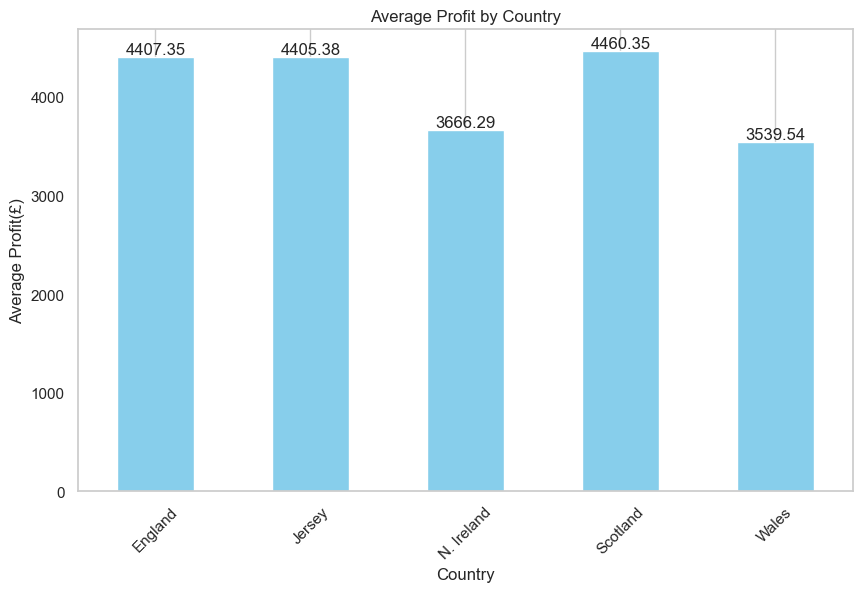

In [33]:
import matplotlib.pyplot as plt

# Calculate average profit for each country
average_profit_by_country = monthly_profit.groupby('Country(UK)')['Profit(£)'].mean()

# Plot bar chart
plt.figure(figsize=(10, 6))
average_profit_by_country.plot(kind='bar', color='skyblue')
plt.title('Average Profit by Country')
plt.xlabel('Country')
plt.ylabel('Average Profit(£)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add annotations
for i, value in enumerate(average_profit_by_country):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()


In [34]:
print("Average Profit by Country:")
print(average_profit_by_country)


Average Profit by Country:
Country(UK)
England       4407.350063
Jersey        4405.381996
N. Ireland    3666.289190
Scotland      4460.345161
Wales         3539.542648
Name: Profit(£), dtype: float64


# 2.11

In [36]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Function to fit ARIMA model and make forecast
def fit_arima(country_data):
    # Split data into train and test sets (80% train, 20% test)
    train_size = int(len(country_data) * 0.8)
    train, test = country_data[:train_size], country_data[train_size:]
    
    # Fit ARIMA model
    model = ARIMA(train, order=(5,1,0))
    model_fit = model.fit()
    
    # Make forecast
    forecast = model_fit.forecast(steps=len(test))
    
    return forecast

# Perform ARIMA modeling for each country
forecast_results = {}
for country, country_df in country_data.items():
    # Remove missing values and convert to numpy array
    country_df = country_df.dropna()
    country_data_np = np.array(country_df['Profit(£)'])
    
    # Fit ARIMA model and make forecast
    forecast = fit_arima(country_data_np)
    forecast_results[country] = forecast

# Print forecast results rounded off to 1 decimal unit
for country, forecast in forecast_results.items():
    print(f"Forecast for {country}:")
    rounded_forecast = [round(val, 1) for val in forecast]
    print(rounded_forecast)
    print()



Forecast for England:
[6501.9, 6362.1, 6153.9, 6758.6, 5946.7, 6094.5, 6360.1, 6034.4, 6339.4, 6277.2, 6118.4, 6298.1, 6182.6]

Forecast for Jersey:
[3661.2, 3385.5, 3392.0, 3255.9, 3524.4, 3615.4, 3551.8, 3485.0, 3475.7, 3454.6, 3497.4, 3512.7, 3509.4, 3495.8]

Forecast for N. Ireland:
[3884.7, 3575.0, 3526.3, 3562.1, 3309.6, 3474.4, 3582.7, 3520.0, 3537.1, 3499.7, 3455.7, 3501.4, 3517.7, 3512.7, 3516.0]

Forecast for Scotland:
[4385.6, 3725.6, 3718.0, 3989.2, 3654.9, 3737.0, 3868.2, 3775.7, 3777.9, 3811.6, 3774.1, 3787.7, 3799.1, 3787.6]

Forecast for Wales:
[3385.9, 3883.3, 3586.4, 5104.2, 4188.9, 4872.6, 3799.7, 4253.6, 4192.2, 4734.6, 4192.3, 4372.0, 4132.9, 4399.0]



# 2.12

In [37]:
from sklearn.linear_model import LinearRegression

# Iterate over countries
for country in countries:
    # Select data for the country
    country_data = data[data['Country(UK)'] == country]
    
    # Prepare independent variables (revenue, cost, units sold)
    X = country_data[['Revenue(£)', 'Cost(£)', 'Units Sold']]
    y = country_data['Profit(£)']
    
    # Fit linear regression model
    model = LinearRegression().fit(X, y)
    
    # Print regression equation
    print(f"Regression equation for {country}: Profit = {model.intercept_:.2f} + "
          f"{model.coef_[0]:.2f} * Revenue + {model.coef_[1]:.2f} * Cost + "
          f"{model.coef_[2]:.2f} * Units Sold")


Regression equation for England: Profit = -69.67 + 0.64 * Revenue + -0.31 * Cost + 0.33 * Units Sold
Regression equation for Jersey: Profit = -29.12 + 0.75 * Revenue + -0.48 * Cost + 0.18 * Units Sold
Regression equation for N. Ireland: Profit = -73.59 + 0.44 * Revenue + 0.15 * Cost + 0.41 * Units Sold
Regression equation for Scotland: Profit = -66.92 + 0.50 * Revenue + -0.03 * Cost + 0.41 * Units Sold
Regression equation for Wales: Profit = 34.27 + 0.73 * Revenue + -0.45 * Cost + 0.16 * Units Sold
